# **Principal Component Analysis + Factor Analysis examples**

# PCA example (breast cancer database)

##### Use the principal component analysis (PCA) technique and analyze the results. 

This exercise forms part of the curriculum for the [Bachelor of Data Science](https://www.unir.net/ingenieria/grado-ciencia-datos/) program at UNIR (Universidad Internacional de la Rioja).


\* *I will not add too much documentation details in this Jupyter since is very well documented in this other PCA exercise that I published [here](https://github.com/jrbayguade/DataTreatment_DimensionalityReduction_PCA/blob/PCA_Class/T7_1_PCA_Principal_Component_Analysis.ipynb)*

In [1]:
import sklearn.datasets as datasets
import pandas as pd

# Load the data from scikit.learn
dataset = datasets.load_breast_cancer()

# Convert to a more useful dataframe
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

# Take a look
df.sample(15)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
164,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.132400,0.097020,0.1801,0.05553,...,28.010,28.22,184.20,2403.0,0.1228,0.35830,0.394800,0.23460,0.3589,0.09187
455,13.380,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.032640,0.1375,0.06016,...,15.050,41.61,96.69,705.6,0.1172,0.14210,0.070030,0.07763,0.2196,0.07675
17,16.130,20.68,108.10,798.8,0.11700,0.20220,0.172200,0.102800,0.2164,0.07356,...,20.960,31.48,136.80,1315.0,0.1789,0.42330,0.478400,0.20730,0.3706,0.11420
64,12.680,23.84,82.69,499.0,0.11220,0.12620,0.112800,0.068730,0.1905,0.06590,...,17.090,33.47,111.80,888.3,0.1851,0.40610,0.402400,0.17160,0.3383,0.10310
302,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.228300,0.128000,0.2249,0.07469,...,23.680,29.43,158.80,1696.0,0.1347,0.33910,0.493200,0.19230,0.3294,0.09469
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.1654,0.36820,0.267800,0.15560,0.3196,0.11510
153,11.150,13.08,70.87,381.9,0.09754,0.05113,0.019820,0.017860,0.1830,0.06105,...,11.990,16.30,76.25,440.8,0.1341,0.08971,0.071160,0.05506,0.2859,0.06772
211,11.840,18.94,75.51,428.0,0.08871,0.06900,0.026690,0.013930,0.1533,0.06057,...,13.300,24.99,85.22,546.3,0.1280,0.18800,0.147100,0.06913,0.2535,0.07993
222,10.180,17.53,65.12,313.1,0.10610,0.08502,0.017680,0.019150,0.1910,0.06908,...,11.170,22.84,71.94,375.6,0.1406,0.14400,0.065720,0.05575,0.3055,0.08797
322,12.860,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.034000,0.1543,0.06476,...,14.040,21.08,92.80,599.5,0.1547,0.22310,0.179100,0.11550,0.2382,0.08553


In [2]:
# Data standarization
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Standardize features (critical for PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

In [3]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_std)

In [4]:
# Compute the eigenvalues and eigenvectors
# 1. Eigenvalues (Explained Variance)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 2. Loadings (Component Coefficients)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Print results
print("Explained Variance Ratios:", explained_variance)
print("Cumulative Variance:", cumulative_variance)
print("\nLoadings (PC1 and PC2):")

for i, feature in enumerate(df.columns[1:]):
    print(f"{feature}: PC1={loadings[i, 0]:.2f}, PC2={loadings[i, 1]:.2f}")

Explained Variance Ratios: [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
Cumulative Variance: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]

Loadings (PC1 and PC2):
mean texture: PC1=0.80, PC2=-0.56
mean perimeter: PC1=0.38, PC2=-0.14
mean area: PC1=0.83, PC2=-0.51
mean smoothness: PC1=0.81, PC2=

In [5]:
# Eigenvectors (PCs) table
# Create a DataFrame with the eigenvectors (PCs) and variable names
eigenvectors_df = pd.DataFrame(
    pca.components_.T, # Transpose to get variables as rows
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df.columns
)

# Just round to 3 decimal places
eigenvectors_df_rounded = eigenvectors_df.round(3)

# Show table
print("\nEigenvectors table:")
print(eigenvectors_df_rounded.to_markdown())


Eigenvectors table:
|                         |   PC1 |    PC2 |    PC3 |    PC4 |    PC5 |    PC6 |    PC7 |    PC8 |    PC9 |   PC10 |   PC11 |   PC12 |   PC13 |   PC14 |   PC15 |   PC16 |   PC17 |   PC18 |   PC19 |   PC20 |   PC21 |   PC22 |   PC23 |   PC24 |   PC25 |   PC26 |   PC27 |   PC28 |   PC29 |   PC30 |
|:------------------------|------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|
| mean radius             | 0.219 | -0.234 | -0.009 | -0.041 | -0.038 |  0.019 | -0.124 | -0.007 | -0.223 |  0.095 |  0.041 | -0.051 | -0.012 |  0.06  | -0.051 |  0.151 |  0.203 |  0.147 | -0.225 | -0.05  |  0.069 | -0.073 |  0.099 |  0.183 |  0.019 |  0.129 | -0.132 | -0.211 | -0.211 |  0.702 |
| mean texture            | 0.104 | -0.06  |  0.065 |  0.603 |  0.049 | -0.032 |  0.011 

☝️ Interpretation of the table above: 
The table is a bit too big to analize it sistematically by human eyes... (roo boring also). 

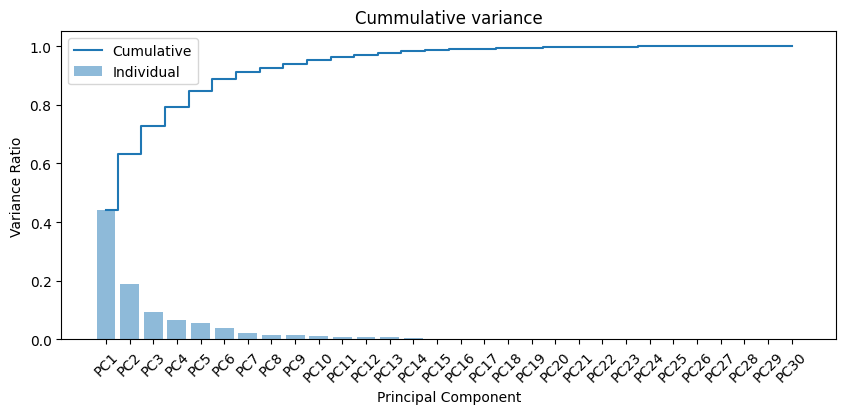

In [6]:
# Cummulative variance
import matplotlib.pyplot as plt

components = np.arange(1, len(explained_variance) + 1)

# Variance plot
plt.figure(figsize=(10, 4))
plt.bar(components, explained_variance, alpha=0.5, align='center', label='Individual')
plt.step(components, cumulative_variance, where='mid', label='Cumulative')

# Personalize the x axis for better readability (and facilitate comprehension)
components_labels = [f'PC{x}' for x in components]
plt.xticks(ticks=components, labels=components_labels, rotation=45)


plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.legend()
plt.title("Cummulative variance")
plt.show()

☝️ Interpretation of the chart above: 
- PC1 and PC2 explain approximately ~60% of the variance.
- From PC1 to PC6 we have captured ~80% of the variance. This translates into an apparent decent utility of the PCA technique

In [7]:
# Biplot (Features + Samples)
plt.figure(figsize=(12, 18))

for l, c in zip(np.unique(y), ('r', 'b', 'g')):
    class_points = X_pca[y == l]
    plt.scatter(class_points[:, 0], class_points[:, 1], c=c, label=f'Class {l}', alpha=0.6)
    centroid = class_points.mean(axis=0)
    plt.plot(centroid[0], centroid[1], 'o', c='k', markersize=10)
    
# Add feature vectors
arrow_scale = 12
arrow_text_offset = 0.2

for i, feature in enumerate(df.columns):
    plt.arrow(0, 0, loadings[i, 0] * arrow_scale, loadings[i, 1] * arrow_scale, 
              color='Black', alpha=0.8, head_width=0.15)
    plt.text(loadings[i, 0] * arrow_scale + arrow_text_offset, loadings[i, 1] * arrow_scale + arrow_text_offset, 
             feature, color='Black')

# Labels and tittle
plt.xlabel('PC1 ({}%)'.format(round(explained_variance[0], 1)))
plt.ylabel('PC2 ({}%)'.format(round(explained_variance[1], 1)))
plt.title("PCA Biplot: Classes + Feature Contributions")
plt.legend()
plt.grid()
plt.show()

NameError: name 'y' is not defined

<Figure size 1200x1800 with 0 Axes>

☝️ Interpretation of the chart above: 

- **Points (Red and Blue)**: Each point represents a data sample (a breast cancer diagnosis) projected onto the first two principal components (PC1 and PC2). The colors indicate the class: red (0) represents the malignant class and blue the benign class
- There is a quite strong **separation of the classes** in the 2D space. That implies an effective discrimination between the two classes by the first two PCs (specially along PC1)
- **Arrows directions**: The direction of an arrow indicates the principal component with which the feature is most strongly correlated. For example, arrows pointing towards the right are positively correlated with PC1, while those pointing upwards are positively correlated with PC2.   
- **Longest arrows** imply those features are the most influential in distinguishing the data along the two PCs. This aligns well with the earlier observation that the first few PCs capture most of the variance.
- **Model building** it could be interesting to proceed to build classification models using either all the features or the top few principal components (probably the first 7 as suggested by the variance plot). Compare then the performance of models trained on both datasets can demonstrate the effectiveness of the PCA for dimensionality in this context. 
<br><br>

**<div class="alert alert-block alert-info">Important observation**: It is quite possible that this PCA has limitations in terms of how much variance is captured by the first few principal components and how well the classes are separated. Let's examine biplots of other pairs of principal components (e.g., PC1 vs. PC3, PC2 vs. PC3) to see if other aspects of the data are revealed. Otherwise we would need to work on different dimensionality reduction techniques or aproaches
</div>

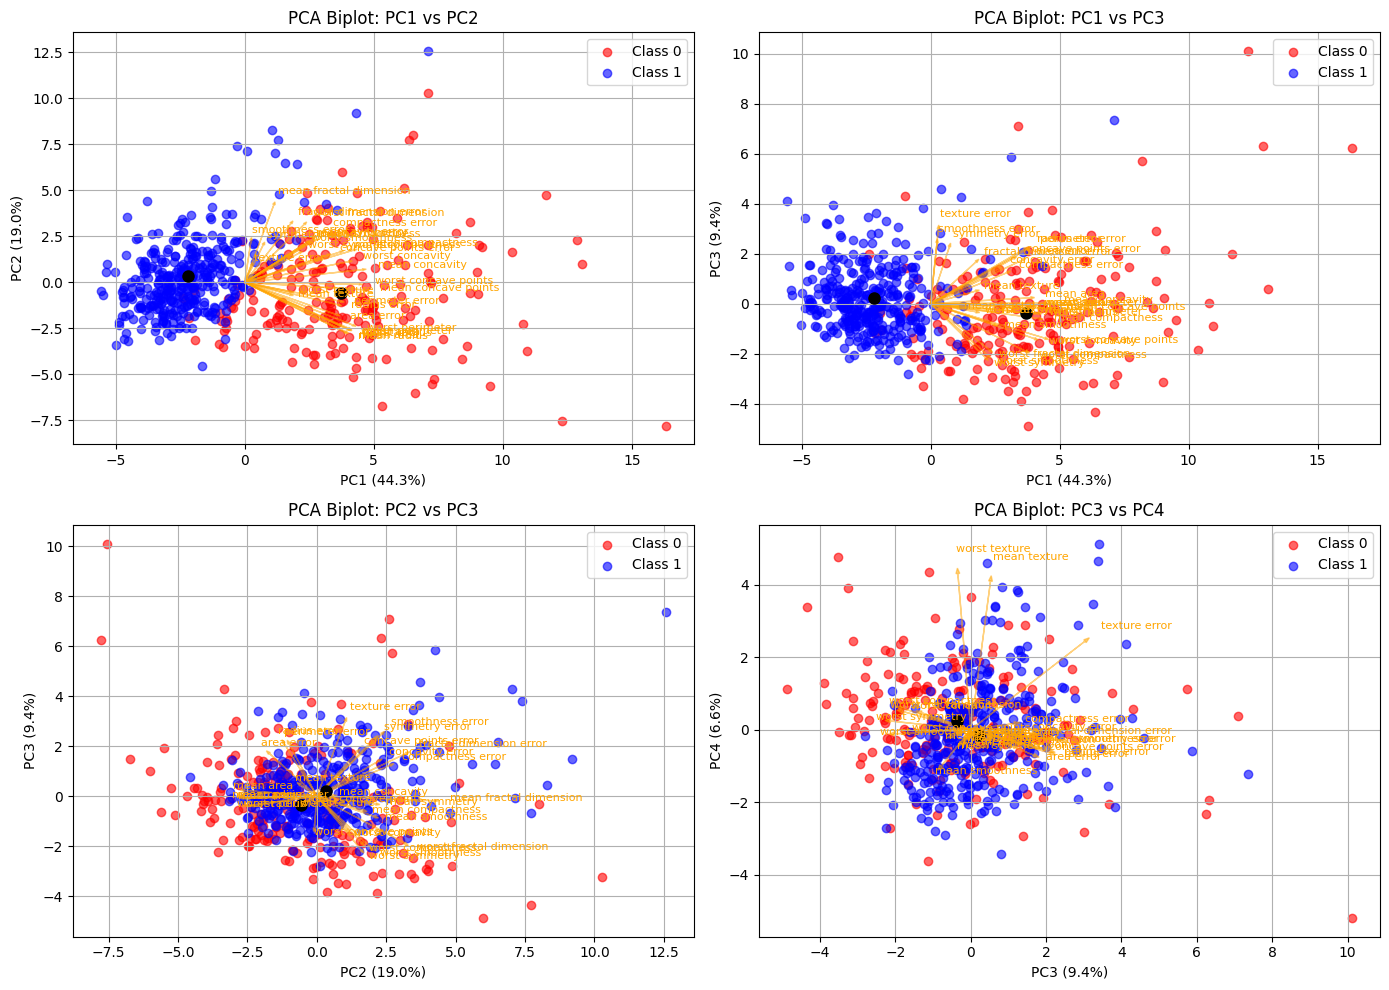

In [ ]:
# Let's examine biplots of other pairs of principal components (e.g., PC1 vs. PC3, PC2 vs. PC3) 
# to see if other aspects of the data are revealed.


# Define function to plot biplots in a more polished way
def biplot(pca_scores, loadings, explained_variance, pc_x=0, pc_y=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Plot samples
    colors = ['r', 'b']
    labels = np.unique(y)
    for label, color in zip(labels, colors):
        idx = y == label
        ax.scatter(pca_scores[idx, pc_x], pca_scores[idx, pc_y],
                   c=color, label=f'Class {label}', alpha=0.6)

    # Plot centroids
    for label, color in zip(labels, colors):
        centroid = pca_scores[y == label].mean(axis=0)
        ax.plot(centroid[pc_x], centroid[pc_y], 'ko', markersize=8)

    # Plot feature vectors
    scale_factor = 5
    for i, (name, loading) in enumerate(zip(dataset.feature_names, loadings)):
        ax.arrow(0, 0, loadings[i, pc_x] * scale_factor, loadings[i, pc_y] * scale_factor,
                 head_width=0.1, length_includes_head=True, color='Orange', alpha=0.5)
        ax.text(loadings[i, pc_x] * scale_factor * 1.1,
                loadings[i, pc_y] * scale_factor * 1.1,
                name, color='Orange', fontsize=8)

    ax.set_xlabel(f'PC{pc_x + 1} ({explained_variance[pc_x]:.1%})')
    ax.set_ylabel(f'PC{pc_y + 1} ({explained_variance[pc_y]:.1%})')
    ax.set_title(f'PCA Biplot: PC{pc_x + 1} vs PC{pc_y + 1}')
    ax.grid(True)
    ax.legend()

    # Create subplots for different PC combinations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
biplot(X_pca, loadings, explained_variance, pc_x=0, pc_y=1, ax=axes[0, 0])
biplot(X_pca, loadings, explained_variance, pc_x=0, pc_y=2, ax=axes[0, 1])
biplot(X_pca, loadings, explained_variance, pc_x=1, pc_y=2, ax=axes[1, 0])
biplot(X_pca, loadings, explained_variance, pc_x=2, pc_y=3, ax=axes[1, 1])

plt.tight_layout()
plt.show()

☝️ Interpretation of the chart above: 
- We are observing different PCA component combinations
- PC1 vs PC2: As said earlier, while PC1 and PC2 capture a significant portion of the variance, the class separation is not perfect. This suggests that additional PCs might be needed to achieve better discrimination.
- PC1 vs PC3: Adding PC3 does not dramatically improve class separation compared to PC1 and PC2 alone.
- PC2 vs PC4: This combination focuses on secondary patterns in the data but does not provide superior class separation compared to PC1 vs. PC2.
- PC3 vs PC4: This combination captures less variance and shows poorer class separation compared to earlier plots.

We should definetly explore considering other dimensionality reduction techniques or skip straight away to other approaches. So let's try with Factor Analysis (FA)

# Factor Analysis (FA)

Factor Analysis (FA) is a powerful statistical method used for dimensionality reduction. It helps uncover latent variables, or "factors," that explain the correlations among observed variables. 

Let's apply it to the same dataset and see what can we learn from this different dimensionality reduction approach.

\* *I will skip most of the details in terms of markup documentation, since I dove into many deatils [in this other FA example](https://github.com/jrbayguade/jrbayguade-Data_treatment_Dimensionality_Reduction_Factorial_Analaysis)*

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler # We will need to standarize quantitative variables

X = StandardScaler().fit_transform(df)  # Standardize the data
kmo_all, kmo_model = calculate_kmo(X)

print("KMO for each variable:")
print(kmo_all)
print("\nKMO Index overall:", kmo_model)

# Here we get an early indication that the dimension reduction via FA will be effective

KMO for each variable:
[0.83463512 0.64352613 0.85334054 0.86403253 0.814716   0.87939755
 0.89192843 0.90027723 0.82510264 0.83181381 0.83412178 0.48458942
 0.84290718 0.85199881 0.64427854 0.8712978  0.82547994 0.83516673
 0.5832182  0.81149623 0.82308704 0.60329755 0.88493799 0.82044529
 0.75316064 0.85127714 0.90222587 0.89105242 0.69074764 0.81233969]

KMO Index overall: 0.8322253094685559


C:\Users\jbosc\AppData\Roaming\Python\Python313\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


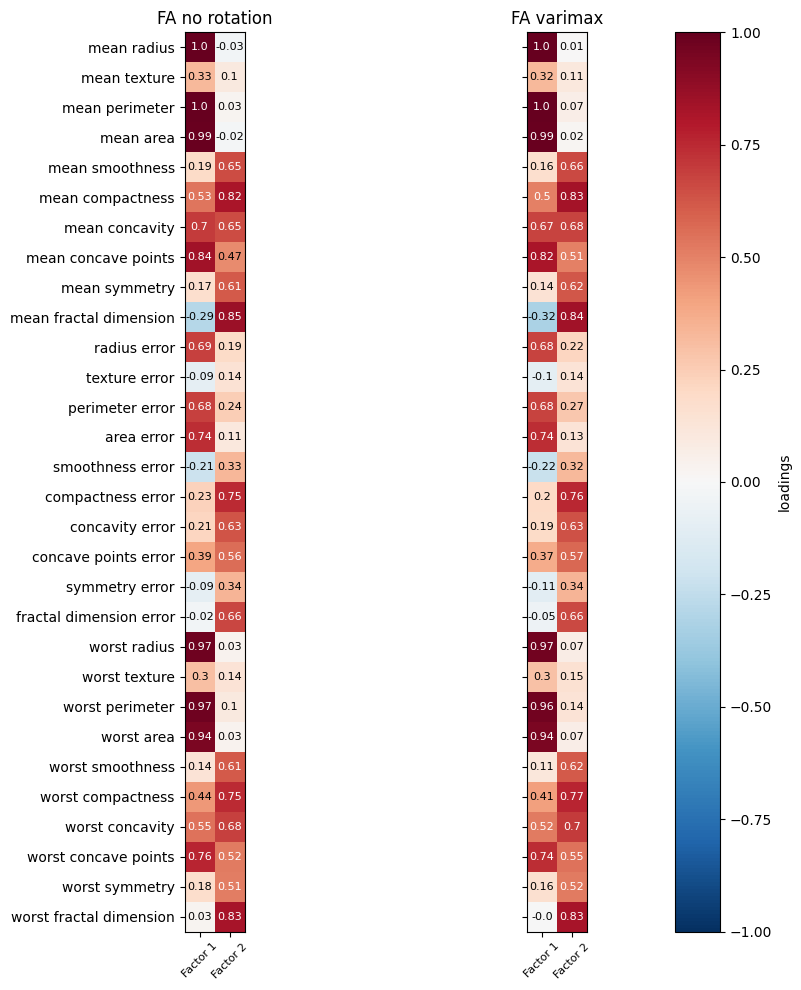

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis # Factor Analysis sklearn's class
from sklearn.preprocessing import StandardScaler # We will need to standarize quantitative variables

X = StandardScaler().fit_transform(df)  # Standardize the data
factors = 2
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]  

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(18, 10))

'''
And loop over the variants of our analysis `fas`, zipped with the 
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)

    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T

    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)

    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        # Lets give some dignity to the chart and the reader by improving its readability
        color = "white" if abs(z) > 0.5 else "black"
        ax.text(j, i, str(z.round(2)), ha="center", va="center", fontsize=8, color=color)

    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(df.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(df.columns)
    else:
        ax.set_yticklabels([])

    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"], rotation=45, fontsize=8)
    

    #  and squeeze the axes tight, to save space
    plt.tight_layout()
    
#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")

#  show us the plot
plt.show()

#### Interpretation ☝️ 

Looking at the FA Varimax:
- Factor 1: We see a clear factor loading correlation among the variables *mean area*, *mean perimeter*, *mean radius* (which makes sense since a big area implies a big radius and a big perimeter). We also see the loading correlation with the *worst ratius*, *worst perimeter*, *worst area* and even *worst concave points*. It all seems to make sense as larger size in one implies larger in others. *worst concave points* seem to suggest that more irregular shapes may be linked to size. Bigger tumors tend to be more malignant.

- Factor 2:  We see a clear factor loading correlation among the variables *mean compactness*, *mean fractal dimension*, *compactness error*, *worst compactness*, *worst concavity* and *worst fractal dimension*. Factor 2 captures shape complexity and boundary irregularity. Irregular shapes (high compactness, concavity, fractal dimension) are also signs of malignancy.

How to use this new knowledge? If we were about to write a ML algorithm to predict which tumors are malignant, we could use these two factors as new features instead of all the raw variables. In any case these factors confirm that size and shape are key predictors of malignancy, which is a valuable information.

<Axes: ylabel='Uniqueness'>

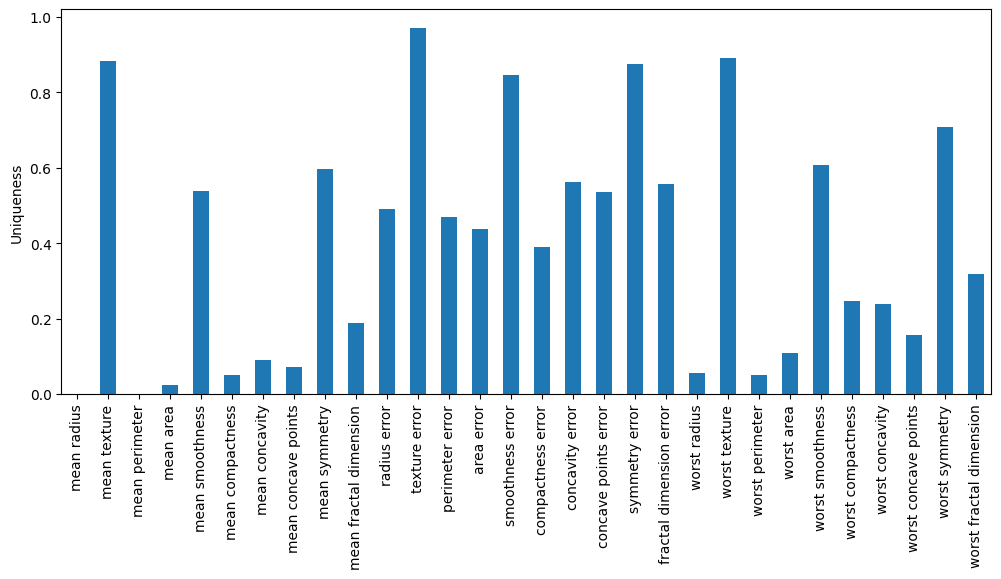

In [ ]:
fa = FactorAnalysis(n_components = 2, rotation="varimax")
fa.fit(X)
uniqueness = pd.Series(fa.noise_variance_, index=df.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness",
    figsize=(12, 5)
)

<Axes: ylabel='communality'>

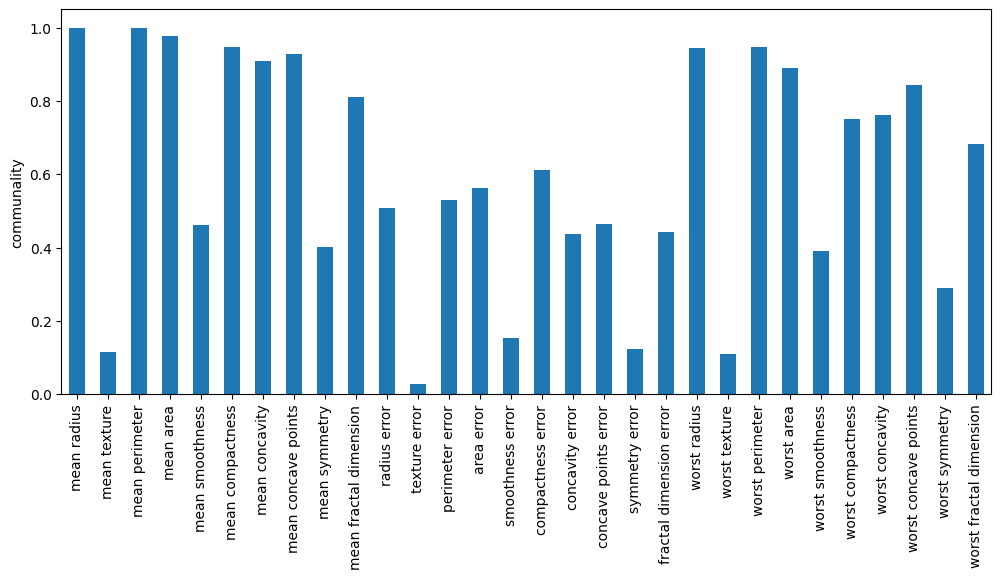

In [ ]:
# Communality
communality = pd.Series(np.square(fa.components_.T).sum(axis=1), index=df.columns)
communality.plot(
    kind="bar",
    ylabel="communality",
    figsize=(12, 5)
)

#### Interpretation ☝️ 

A big chunk of the variables' variance above is explained by the common factors, which indicates that in principle we can rely on the results of FCA for the most part.


**All in all, the FA approach was more productive than the PCA in this scenario**